**Task 3: Customer Segmentation / Clustering**

Step - 1

In [1]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

print(uploaded.keys())


customer_file = [key for key in uploaded.keys() if 'Customers' in key][0]
product_file = [key for key in uploaded.keys() if 'Products' in key][0]
transaction_file = [key for key in uploaded.keys() if 'Transactions' in key][0]

customers = pd.read_csv(io.BytesIO(uploaded[customer_file]))
products = pd.read_csv(io.BytesIO(uploaded[product_file]))
transactions = pd.read_csv(io.BytesIO(uploaded[transaction_file]))

# Displays first few rows
customers.head(), products.head(), transactions.head()

Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv
dict_keys(['Transactions.csv', 'Products.csv', 'Customers.csv'])


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067   2024-04-25 7:38:55    

Step - 2

In [2]:
import pandas as pd


# 1. Checking for Duplicate Values
print("Duplicate values in Customers:", customers.duplicated().sum())
print("Duplicate values in Products:", products.duplicated().sum())
print("Duplicate values in Transactions:", transactions.duplicated().sum())


# 2. Checking for Null Values
print("\nNull values in Customers:\n", customers.isnull().sum())
print("\nNull values in Products:\n", products.isnull().sum())
print("\nNull values in Transactions:\n", transactions.isnull().sum())

products.dropna(subset=['ProductName'], inplace=True)

Duplicate values in Customers: 0
Duplicate values in Products: 0
Duplicate values in Transactions: 0

Null values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Null values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Null values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Step- 3 :

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Merging the datasets
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='left')
data = pd.merge(customer_transactions, products, on='ProductID', how='left')

# Select relevant features for clustering
features = ['CustomerName', 'Region', 'SignupDate', 'Category', 'TotalValue', 'Quantity']
features = ['TotalValue', 'Quantity']
X = data[features]

# Handling missing values for numerical features only
numerical_features = ['TotalValue', 'Quantity']
X = X.fillna(X.mean())
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled = scaler.fit_transform(X)

Step - 4 : Applying K-means clustering

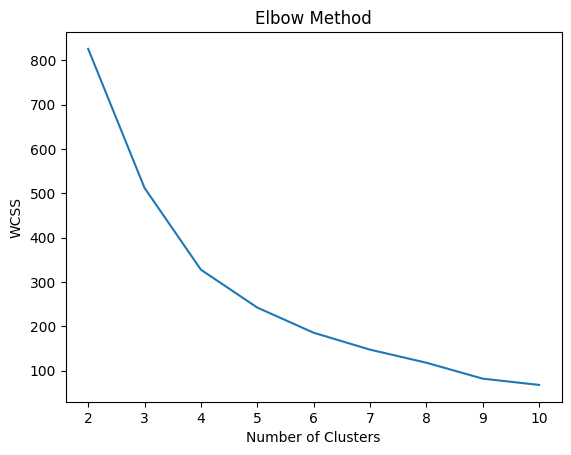

In [10]:
wcss = []
for i in range(2, 11):  # Checking for 2 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-Means clustering with the chosen number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)